In [ ]:
from selenium import webdriver 


law_url = "https://law.judicial.gov.tw/FJUD/default_AD.aspx"
browser = webdriver.Chrome('/Users/Colin Lau/anaconda3/Lib/site-packages/selenium/webdriver/chromedriver')

In [10]:
frontpage = browser.get(law_url)

In [11]:
#印出首頁的html，查找需要輸入的部分的code

import requests
from bs4 import BeautifulSoup

request_law = requests.get(law_url)
soup_law = BeautifulSoup (request_law.text, "html.parser")
#print(soup_law)

In [12]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains 
import time
import re

#輸入限定尋找90年至110年的判決書：
#輸入"90"
elem = browser.find_element(By.XPATH,'//*[@id="dy1"]') 
elem.clear()
elem.send_keys("90")

#輸入"110"
elem = browser.find_element(By.XPATH,'//*[@id="dy2"]') 
elem.clear()
elem.send_keys("110")

In [13]:
#選取所有的地方法院

for i in range (18, 41):
    xpath_branch = '//*[@id="jud_court"]/option['+ str(i) +']'
    branch = browser.find_element(By.XPATH, '//*[@id="jud_court"]/option['+ str(i) +']')
    branch.click()
time.sleep(4)

In [14]:
#刑事案件打勾

checkbox = browser.find_element(By.XPATH,'//*[@id="vtype_M"]/input')
checkbox.click()
time.sleep(4)

In [15]:
#裁判案由限縮為“殺人”
elem_reason = browser.find_element(By.XPATH,'//*[@id="jud_title"]') 
elem_reason.clear()
elem_reason.send_keys("殺人")
time.sleep(4)

#裁判全文內容排除裁定
elem_content = browser.find_element(By.XPATH,'//*[@id="jud_kw"]') 
elem_content.clear()
elem_content.send_keys(" -裁定")
time.sleep(4)

In [16]:
#送出篩選結果
checkbox.send_keys(Keys.RETURN)
time.sleep(4)

In [17]:
#用for loop跑每個子網頁的頁面
lst_law_title = []
for i in range (1,26):
    new_law_url = "https://law.judicial.gov.tw/FJUD/qryresultlst.aspx?q=93d3d3c30da7d60ccb836a55264310ae&sort=DS&&Page="+str(i)
    request_new_law = requests.get(new_law_url)
    new_law_soup = BeautifulSoup (request_new_law.text, "html.parser")
    law_title = new_law_soup.find_all("a", id="hlTitle")
    #print(law_title)
#用關鍵字”重訴”剔除所有殺人未遂的案件
    for j in range (len(law_title)):
        if "重訴" in str(law_title[j]):
            lst_law_title.append(law_title[j])
#print(len(lst_law_title))
#print(type(lst_law_title[0]))

In [18]:
#取出所有的判決書的href
href_lst=[]
for tag in lst_law_title:
    tag_href = tag.get("href")
    href_lst.append(tag_href)
    #print(tag.get("href"))

In [19]:
#用每個href進入判決書網頁
murder_case = []
Reduce_Sentence =[]
NReduce_Sentence =[]
for i in range (len(href_lst)):
    case_url ="https://law.judicial.gov.tw/FJUD/"+str(href_lst[i])
    request_case = requests.get(case_url)
    case_soup = BeautifulSoup (request_case.text, "html.parser")
    
    #排除其他奇怪的非殺人罪
    if "解剖" in str(case_soup):
        murder_case.append(case_soup)
#print(murder_case)
print(len(murder_case))

#分類殺人案中有沒有減刑
for j in range (len(murder_case)):
    if ("減輕其刑") in str(murder_case[j]):
        Reduce_Sentence.append(murder_case[j])
    else:
        NReduce_Sentence.append(murder_case[j])
#print(Reduce_Sentence[0])
print(len(Reduce_Sentence))
print(len(NReduce_Sentence))
#print(NReduce_Sentence[0])
#print(case_soup)

112
68
44


In [20]:
#有減刑中區分被告是否有精神障礙問題
psycho_reduce = []
non_psycho_reduce = []

for i in range(len(Reduce_Sentence)):
    if "精神障礙" in str(Reduce_Sentence[i]):
        psycho_reduce.append(Reduce_Sentence[i])
    else:
        non_psycho_reduce.append(Reduce_Sentence[i])
#print(psycho_reduce[0])
#print(non_psycho_reduce[0])
#find(class_ = "").text
print (len(psycho_reduce))
print (len(non_psycho_reduce))

27
41


In [21]:
#將所有的soup檔案轉成為text

psycho_reduce_text = []
non_psycho_reduce_text = []


for i in range (len(psycho_reduce)):
    text = psycho_reduce[i].find(class_ ="tab_content").text
    psycho_reduce_text.append (text)
#print (psycho_reduce_text[9])

for i in range (len(non_psycho_reduce)):
    text = non_psycho_reduce[i].find(class_ ="tab_content").text
    non_psycho_reduce_text.append (text)
#print (non_psycho_reduce_text[9])

In [22]:
#再區分看看沒有減刑的部分是否有被告提出有精神障礙問題
psycholst =[]
nonpsycholst =[]

for i in range (len(NReduce_Sentence)):
    if "精神障礙" in str(NReduce_Sentence[i]):
        psycholst.append (NReduce_Sentence[i])
    else:
         nonpsycholst.append (NReduce_Sentence[i])
print (len (nonpsycholst))
#print (nonpsycholst[9])
print (len (psycholst))
#確認沒有減刑的部分都沒有報告提到有精神障礙
#print (psycholst[1])

41
3


In [23]:
#一樣將所有的soup檔案轉成為text

nonpsycholst_text = []
psycholst_text = []

for i in range (len(nonpsycholst)):
    text = nonpsycholst[i].find(class_ ="tab_content").text
    nonpsycholst_text.append (text)  
#print (nonpsycholst_text[3])

for i in range (len(psycholst)):
    text = psycholst[i].find(class_ ="tab_content").text
    psycholst_text.append (text) 

In [24]:
#沒有減刑&有精神障礙的案件，提取出最終判刑年份
year1=[]
for i in range (len(psycholst_text)):
    filter1 = psycholst_text[i].partition("本院判決如下")
    #print(filter1[2])
    no1filter = filter1[2]
    filter2 = no1filter.partition ("犯罪事實")
    #print(filter2[0])
    no2filter = filter2[0]
    filter3 = no2filter.partition ("事  實")
    #print (filter3[0])
    filter3 = no2filter.partition("，處")
    no3filter = filter3[2]
    #print (filter3[2])
    filter4 = no3filter.partition('年')
    #print(filter4[0])
    no4filter = filter4[0]
    filter5 = no4filter.partition ("，褫奪公權")
    #print(filter5[0])
    year1.append(filter5[0])
print(year1)
    #len(nonpsycholst)

['有期徒刑拾壹', '無期徒刑', '無期徒刑']


In [25]:
#沒有減刑&沒有精神障礙的案件，提取出最終判刑年份
year2 = []
for i in range (len(nonpsycholst_text)):
    filter1 = nonpsycholst_text[i].partition("本院判決如下")
    #print(filter1[2])
    no1filter = filter1[2]
    filter2 = no1filter.partition ("犯罪事實")
    #print(filter2[0])
    no2filter = filter2[0]
    filter3 = no2filter.partition ("事  實")
    #print (filter3[0])
    filter3 = no2filter.partition("，處")
    no3filter = filter3[2]
    #print (filter3[2])
    filter4 = no3filter.partition('年')
    #print(filter4[0])
    no4filter = filter4[0]
    filter5 = no4filter.partition ("，褫")
    #print(filter5[0])
    year2.append(filter5[0])
print(year2)

['有期徒刑拾肆', '有期徒刑拾參', '有期徒刑拾伍', '有期徒刑拾伍', '有期徒刑壹', '有期徒刑拾伍', '有期徒刑拾肆', '有期徒刑貳', '有期徒刑伍', '', '有期徒刑拾肆', '無期徒刑', '無期徒刑', '無期徒刑', '有\r\n期徒刑拾', '有期徒刑拾捌', '', '有期徒刑拾伍', '有期徒刑參月，如易科罰金，以新臺幣壹仟元折算\r\n壹日；又犯殺人罪，處有期徒刑拾伍', '有期徒刑捌', '有期徒刑捌', '無期徒刑', '有期徒刑拾陸', '', '有期徒刑拾貳', '有期徒刑拾肆', '', '', '有期徒刑拾', '有期徒刑拾', '', '有期徒刑拾肆', '有期徒刑捌', '有期徒刑拾肆', '有期徒刑拾肆', '有期徒刑拾伍', '有期徒刑拾貳', '無期徒刑', '無期徒刑', '有期徒刑拾肆', '拘役伍拾日，如易科罰金，以新臺\r\n幣壹仟元折算壹日；扣案恐嚇信件壹紙沒收。又犯殺人罪，處有\r\n期徒刑拾肆']


In [26]:
year2[9] ="無罪"
year2[14] ="有期徒刑拾"
year2[16] ="無罪"
year2[18] ="有期徒刑拾伍"
year2[23] ="無期徒刑"
year2[26]="有期徒刑捌"
year2[27]="有期徒刑捌"
year2[30]="無罪"
year2[-1] ="有期徒刑拾肆"
print(year2)

['有期徒刑拾肆', '有期徒刑拾參', '有期徒刑拾伍', '有期徒刑拾伍', '有期徒刑壹', '有期徒刑拾伍', '有期徒刑拾肆', '有期徒刑貳', '有期徒刑伍', '無罪', '有期徒刑拾肆', '無期徒刑', '無期徒刑', '無期徒刑', '有期徒刑拾', '有期徒刑拾捌', '無罪', '有期徒刑拾伍', '有期徒刑拾伍', '有期徒刑捌', '有期徒刑捌', '無期徒刑', '有期徒刑拾陸', '無期徒刑', '有期徒刑拾貳', '有期徒刑拾肆', '有期徒刑捌', '有期徒刑捌', '有期徒刑拾', '有期徒刑拾', '無罪', '有期徒刑拾肆', '有期徒刑捌', '有期徒刑拾肆', '有期徒刑拾肆', '有期徒刑拾伍', '有期徒刑拾貳', '無期徒刑', '無期徒刑', '有期徒刑拾肆', '有期徒刑拾肆']


In [27]:
#有減刑&有精神障礙的案件，提取出最終判刑年份
year3 = []
for i in range (len(psycho_reduce_text)):
    filter1 = psycho_reduce_text [i].partition("本院判決如下")
    #print(filter1[2])
    no1filter = filter1[2]
    filter2 = no1filter.partition ("犯罪事實")
    #print(filter2[0])
    no2filter = filter2[0]
    filter3 = no2filter.partition ("事  實")
    #print (filter3[0])
    filter3 = no2filter.partition("，處")
    no3filter = filter3[2]
    #print (filter3[2])
    filter4 = no3filter.partition('年')
    #print(filter4[0])
    no4filter = filter4[0]
    filter5 = no4filter.partition ("，褫奪公權")
    #print(filter5[0])
    year3.append(filter5[0])
print (year3)
print (len(year3))

['有期徒刑肆', '有期徒刑拾參', '死刑', '無期徒刑', '有期徒刑玖', '有期徒刑壹拾伍', '有期徒刑貳', '死刑、無期徒刑或10', '', '有期徒刑拾肆', '有期徒刑柒', '有期徒刑拾參', '', '有期徒刑拾壹', '有期徒刑拾壹', '有期徒刑拾柒', '有\r\n期徒刑肆', '', '有期徒刑拾肆', '有期徒刑拾參', '有期徒刑貳拾', '有期徒刑拾壹', '無期徒刑', '有期徒刑拾伍', '有期徒刑拾捌', '有期徒刑玖', '有期徒刑拾陸']
27


In [28]:
#整理跑出奇怪的結果的部分

year3 [7] = "有期徒刑玖"
year3 [8] = "死刑"
year3 [12] = "無期徒刑"
year3 [16] = "有期徒刑肆"
year3 [17] = "無罪"
print(year3)
year3 = sorted (year3, reverse=True)
print(year3)

['有期徒刑肆', '有期徒刑拾參', '死刑', '無期徒刑', '有期徒刑玖', '有期徒刑壹拾伍', '有期徒刑貳', '有期徒刑玖', '死刑', '有期徒刑拾肆', '有期徒刑柒', '有期徒刑拾參', '無期徒刑', '有期徒刑拾壹', '有期徒刑拾壹', '有期徒刑拾柒', '有期徒刑肆', '無罪', '有期徒刑拾肆', '有期徒刑拾參', '有期徒刑貳拾', '有期徒刑拾壹', '無期徒刑', '有期徒刑拾伍', '有期徒刑拾捌', '有期徒刑玖', '有期徒刑拾陸']
['無罪', '無期徒刑', '無期徒刑', '無期徒刑', '死刑', '死刑', '有期徒刑貳拾', '有期徒刑貳', '有期徒刑肆', '有期徒刑肆', '有期徒刑玖', '有期徒刑玖', '有期徒刑玖', '有期徒刑柒', '有期徒刑拾陸', '有期徒刑拾肆', '有期徒刑拾肆', '有期徒刑拾柒', '有期徒刑拾捌', '有期徒刑拾壹', '有期徒刑拾壹', '有期徒刑拾壹', '有期徒刑拾參', '有期徒刑拾參', '有期徒刑拾參', '有期徒刑拾伍', '有期徒刑壹拾伍']


In [29]:
#有減刑&沒有精神障礙的案件，提取出最終判刑年份
year4 = []
for i in range (len(non_psycho_reduce_text)):
    filter1 = non_psycho_reduce_text[i].partition("本院判決如下")
    #print(filter1[2])
    no1filter = filter1[2]
    filter2 = no1filter.partition ("犯罪事實")
    #print(filter2[0])
    no2filter = filter2[0]
    filter3 = no2filter.partition ("事  實")
    #print (filter3[0])
    filter3 = no2filter.partition("，處")
    no3filter = filter3[2]
    #print (filter3[2])
    filter4 = no3filter.partition('年')
    #print(filter4[0])
    no4filter = filter4[0]
    filter5 = no4filter.partition ("，褫奪公權")
    #print(filter5[0])
    year4.append(filter5[0])
print (year4)

['有期徒刑拾肆', '有期徒刑貳', '有期徒刑玖', '有期徒刑捌', '有期徒刑拾肆', '有期徒刑拾柒', '有期徒刑拾貳', '有期徒刑拾玖', '有期徒刑拾貳', '有期徒刑拾伍', '', '有期徒刑拾參', '有期徒刑拾肆', '有期徒刑貳月，如易科罰金以新臺幣壹\r\n仟元折算壹日；承恩救護記錄表一式三聯各聯上送醫後病人家屬\r\n關係人簽名欄中偽造之「黃○程」署押壹枚，共參枚，均沒收。\r\n又共同犯遺棄屍體罪，處有期徒刑壹', '無期徒刑', '有期徒刑玖', '有期徒刑拾捌', '有期徒刑5 ', '', '', '有期徒刑拾', '有期徒刑捌', '有期徒刑拾肆', '有期徒刑伍', '無期徒刑', '有期徒刑柒', '有期徒刑柒', '有期徒刑參月，如易科罰金，以新\r\n臺幣壹仟元折算壹日；又犯殺人罪，處有期徒刑拾陸', '有期徒刑貳拾', '有期徒刑拾參', '', '有期徒刑捌', '無期徒刑', '', '有期徒刑拾參', '有期徒刑捌', '有期徒刑肆', '有期徒刑拾貳', '有期徒刑拾肆', '有期徒刑肆\r\n', '有期徒刑拾肆']


In [30]:
#整理跑出奇怪的結果的部分
year4 [10]="無期徒刑"
year4 [13]="有期徒刑貳月"
year4 [17]="有期徒刑伍"
year4 [18]="有期徒刑拾肆"
year4 [19]="有期徒刑拾肆"
year4 [27] ="有期徒刑拾陸"
year4 [30] = "??"
year4 [33] = "有期徒刑拾壹"
year4 [-2] ='有期徒刑肆'
print(year4)
print(len(year4))
year4 = sorted (year4, reverse=True)
print(year4)

['有期徒刑拾肆', '有期徒刑貳', '有期徒刑玖', '有期徒刑捌', '有期徒刑拾肆', '有期徒刑拾柒', '有期徒刑拾貳', '有期徒刑拾玖', '有期徒刑拾貳', '有期徒刑拾伍', '無期徒刑', '有期徒刑拾參', '有期徒刑拾肆', '有期徒刑貳月', '無期徒刑', '有期徒刑玖', '有期徒刑拾捌', '有期徒刑伍', '有期徒刑拾肆', '有期徒刑拾肆', '有期徒刑拾', '有期徒刑捌', '有期徒刑拾肆', '有期徒刑伍', '無期徒刑', '有期徒刑柒', '有期徒刑柒', '有期徒刑拾陸', '有期徒刑貳拾', '有期徒刑拾參', '??', '有期徒刑捌', '無期徒刑', '有期徒刑拾壹', '有期徒刑拾參', '有期徒刑捌', '有期徒刑肆', '有期徒刑拾貳', '有期徒刑拾肆', '有期徒刑肆', '有期徒刑拾肆']
41
['無期徒刑', '無期徒刑', '無期徒刑', '無期徒刑', '有期徒刑貳月', '有期徒刑貳拾', '有期徒刑貳', '有期徒刑肆', '有期徒刑肆', '有期徒刑玖', '有期徒刑玖', '有期徒刑柒', '有期徒刑柒', '有期徒刑捌', '有期徒刑捌', '有期徒刑捌', '有期徒刑捌', '有期徒刑拾陸', '有期徒刑拾貳', '有期徒刑拾貳', '有期徒刑拾貳', '有期徒刑拾肆', '有期徒刑拾肆', '有期徒刑拾肆', '有期徒刑拾肆', '有期徒刑拾肆', '有期徒刑拾肆', '有期徒刑拾肆', '有期徒刑拾肆', '有期徒刑拾玖', '有期徒刑拾柒', '有期徒刑拾捌', '有期徒刑拾壹', '有期徒刑拾參', '有期徒刑拾參', '有期徒刑拾參', '有期徒刑拾伍', '有期徒刑拾', '有期徒刑伍', '有期徒刑伍', '??']


In [32]:
import re

In [301]:
def conversion(s):
    pattrern2 ='[〇一二三四五六七八九零壹貳叁肆伍陸柒捌玖貮兩拾參]'
    CN_NUM = {
 '〇': 0, '一': 1, '二': 2, '三': 3, '四': 4, '五': 5, '六': 6, '七': 7, '八': 8, '九': 9, '零': 0,
 '壹': 1, '貳': 2, '叁': 3, '肆': 4, '伍': 5, '陸': 6, '柒': 7, '捌': 8, '玖': 9, '貮': 2, '兩': 2,'拾':1,'參':3}
    
    if s == '無罪' or s =='??' :
        return 0
    elif s == '無期徒刑' or s =='死刑':
        return 100
    else:
        year1_1 = re.findall(pattrern2,s)#轉化數字
        for i in range(len(year1_1)):
            new_str = ''
            for j in year1_1[i]:
                new_str += str(CN_NUM[j])
            year1_1[i] = new_str

        number = ''
        for i in range(len(year1_1)):
            number = number + year1_1[i]
    
        number = int(number)
        return number

In [302]:
year1_list = []
for i in range(len(year1)):
    new = conversion(year1[i])
    year1_list.append(new)

year2_list = []
for i in range(len(year2)):
    new = conversion(year2[i])
    year2_list.append(new)

year3_list = []
for i in range(len(year3)):
    new = conversion(year3[i])
    year3_list.append(new)
year3_list[26]=15

year4_list = []
for i in range(len(year4)):
    new = conversion(year4[i])
    year4_list.append(new)

In [303]:
def num(s):
    num = []
    for i in range(len(s)):
        if s[i] not in num:
            num.append(s[i])
        else:
            continue
    return num

def graph(num,list):
    import pandas as pd
    dict = {}
    for i in range(25):
        count = list.count(i)
        dict[i]=count
    df = pd.DataFrame(dict.items(),columns = ['year of sentence','occurence'])
    return df

In [318]:
year1_data = graph(num(year1_list),year1_list)
year2_data = graph(num(year2_list),year2_list)
year3_data = graph(num(year3_list),year3_list)
year4_data = graph(num(year4_list),year4_list)

year1_data ['constant']=1
year2_data ['constant']=2
year3_data ['constant']=3
year4_data ['constant']=4

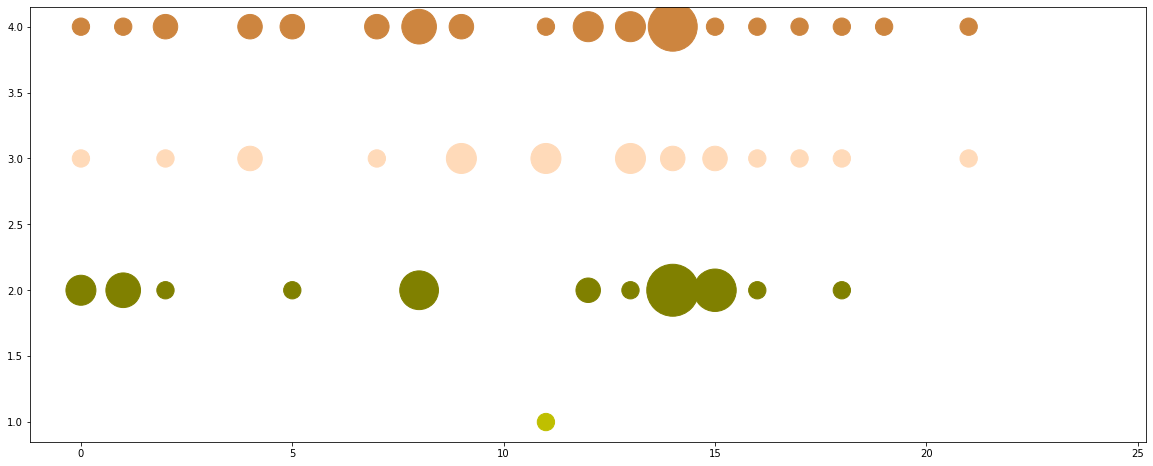

In [319]:
from matplotlib.font_manager import FontProperties
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

vals1 = year1_data.values
plt.scatter(vals1[:,0],vals1[:,2],s = 300*vals1[:,1],c='y')

vals2 = year2_data.values
plt.scatter(vals2[:,0],vals2[:,2],s = 300*vals2[:,1],c='olive')

vals3 = year3_data.values
plt.scatter(vals3[:,0],vals3[:,2],s = 300*vals3[:,1],c='peachpuff')

vals4 = year4_data.values
plt.scatter(vals4[:,0],vals4[:,2],s = 300*vals4[:,1],c='peru')

plt.show()

In [350]:
year1_data['weighted'] = year1_data['year of sentence'] * year1_data['occurence']
mean1 = year1_data['weighted'].sum()/year1_data['occurence'].sum()

year2_data['weighted'] = year2_data['year of sentence'] * year2_data['occurence']
mean2 = year2_data['weighted'].sum()/year2_data['occurence'].sum()

year3_data['weighted'] = year3_data['year of sentence'] * year3_data['occurence']
mean3 = year3_data['weighted'].sum()/year3_data['occurence'].sum()

year4_data['weighted'] = year4_data['year of sentence'] * year4_data['occurence']
mean4 = year4_data['weighted'].sum()/year4_data['occurence'].sum()

In [355]:
print(mean1)
print(mean2)
print(mean3)
print(mean4)

11.0
9.941176470588236
11.181818181818182
10.567567567567568


In [374]:
def ttest_list(list):
    newlist = []
    for i in range(len(list)):
        if list[i] != 0 and list[i] != 100:
            newlist.append(list[i])
        else:
            continue
    return newlist

In [378]:
from scipy import stats

year1_new = ttest_list(year1_list)
year2_new = ttest_list(year2_list)
year3_new = ttest_list(year3_list)
year4_new = ttest_list(year4_list)

tStat, pValue =  stats.ttest_ind(year3_new, year4_new)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.5335428093415135 T-Statistic:0.6265553516324028


In [271]:
def graph_graph(num,list):
    import pandas as pd
    dict = {}
    for i in range(100,101):
        count = list.count(i)
        dict[i]=count
    df = pd.DataFrame(dict.items(),columns = ['year of sentence','occurence'])
    return df

In [313]:
year1_data_death = graph_graph(num(year1_list),year1_list)
year2_data_death = graph_graph(num(year2_list),year2_list)
year3_data_death = graph_graph(num(year3_list),year3_list)
year4_data_death = graph_graph(num(year4_list),year4_list)

year1_data_death ['constant']=2
year2_data_death ['constant']=4
year3_data_death ['constant']=6
year4_data_death ['constant']=8

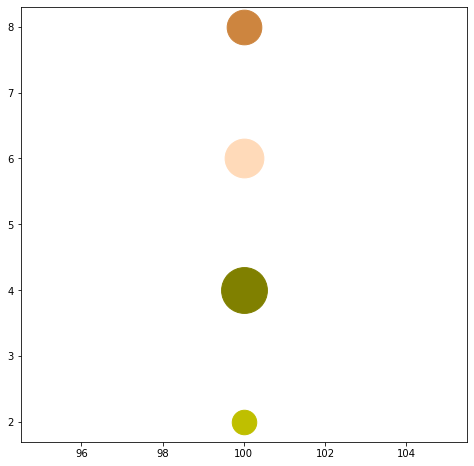

In [314]:
from matplotlib.font_manager import FontProperties
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

vals1 = year1_data_death.values
plt.scatter(vals1[:,0],vals1[:,2],s = 300*vals1[:,1],c='y')

vals2 = year2_data_death.values
plt.scatter(vals2[:,0],vals2[:,2],s = 300*vals2[:,1],c='olive')

vals3 = year3_data_death.values
plt.scatter(vals3[:,0],vals3[:,2],s = 300*vals3[:,1],c='peachpuff')

vals4 = year4_data_death.values
plt.scatter(vals4[:,0],vals4[:,2],s = 300*vals4[:,1],c='peru')

plt.show()

In [2]:
chidata = [[41, 27],
         [3, 41]]

import scipy.stats as stats

print(stats.fisher_exact(chidata))

(20.753086419753085, 3.5707263656369518e-09)
